<a href="https://colab.research.google.com/github/shibajiray/programming-foundations-data-structures-4410875/blob/main/randomforestknn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import files


uploaded = files.upload()


Saving Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv to Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv


In [ ]:
# Load the dataset
df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')


In [ ]:
# Numeric Conversion
df['DOF Gross Floor Area'] = pd.to_numeric(df['DOF Gross Floor Area'], errors='coerce').astype(float)
df['Largest Property Use Type - Gross Floor Area (ft²)'] = pd.to_numeric(df['Largest Property Use Type - Gross Floor Area (ft²)'], errors='coerce').astype(float)
df['Site EUI (kBtu/ft²)'] = pd.to_numeric(df['Site EUI (kBtu/ft²)'], errors='coerce').astype(float)
df['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(df['Weather Normalized Site EUI (kBtu/ft²)'], errors='coerce').astype(float)
df['Weather Normalized Site Electricity Intensity (kWh/ft²)'] = pd.to_numeric(df['Weather Normalized Site Electricity Intensity (kWh/ft²)'], errors='coerce').astype(float)
df['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = pd.to_numeric(df['Weather Normalized Site Natural Gas Intensity (therms/ft²)'], errors='coerce').astype(float)
df['Weather Normalized Source EUI (kBtu/ft²)'] = pd.to_numeric(df['Weather Normalized Source EUI (kBtu/ft²)'], errors='coerce').astype(float)
df['Electricity Use - Grid Purchase (kBtu)'] = pd.to_numeric(df['Electricity Use - Grid Purchase (kBtu)'], errors='coerce').astype(float)
df['Weather Normalized Site Electricity (kWh)'] = pd.to_numeric(df['Weather Normalized Site Electricity (kWh)'], errors='coerce').astype(float)
df['Total GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(df['Total GHG Emissions (Metric Tons CO2e)'], errors='coerce').astype(float)
df['Direct GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(df['Direct GHG Emissions (Metric Tons CO2e)'], errors='coerce').astype(float)
df['Indirect GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(df['Indirect GHG Emissions (Metric Tons CO2e)'], errors='coerce').astype(float)
df['Water Use (All Water Sources) (kgal)'] = pd.to_numeric(df['Water Use (All Water Sources) (kgal)'], errors='coerce').astype(float)
df['Water Intensity (All Water Sources) (gal/ft²)'] = pd.to_numeric(df['Water Intensity (All Water Sources) (gal/ft²)'], errors='coerce').astype(float)
df['Source EUI (kBtu/ft²)'] = pd.to_numeric(df['Source EUI (kBtu/ft²)'], errors='coerce').astype(float)

#replace non-numeric values with NaN and then convert, the column to float from object, y

df['ENERGY STAR Score'] = pd.to_numeric(df['ENERGY STAR Score'], errors='coerce').astype(float)


In [ ]:
# Extract only numeric columns for imputation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
columns_to_remove = ['Order','Property Id','Latitude', 'Longitude','Community Board','Council District','Census Tract']
numeric_df = numeric_df.drop(columns=[col for col in columns_to_remove if col in numeric_df.columns], axis=1)

In [ ]:
# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=11)

In [ ]:
# Impute missing values in all numeric columns
imputed_data = knn_imputer.fit_transform(numeric_df)

In [ ]:
# Convert the result back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns)


In [ ]:
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [ ]:
imputed_df.head()

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²)
0,289356.0,293447.0,1963.0,2.0,100.0,93.090909,305.600000,303.100000,37.800000,0.345455,614.200000,3.813937e+07,1.108277e+07,6962.2,0.0,6962.2,762051.0,202711.445455,782.922727,619.400000
1,3693539.0,3889181.0,1969.0,12.0,100.0,55.000000,229.800000,228.800000,24.800000,2.400000,401.100000,3.323659e+08,9.626131e+07,55870.4,51016.4,4854.1,3889181.0,71744.845455,214.230909,404.300000
2,152765.0,231342.0,1924.0,1.0,100.0,56.181818,100.736364,103.581818,11.345455,0.654545,189.581818,9.249191e+06,2.666284e+06,0.0,0.0,0.0,231342.0,9057.772727,38.778182,187.890909
3,891040.0,1305748.0,1971.0,1.0,100.0,79.090909,93.563636,94.890909,15.418182,0.072727,215.518182,6.639825e+07,1.935300e+07,0.0,0.0,0.0,1305748.0,87388.654545,73.339091,214.481818
4,211400.0,179694.0,1932.0,1.0,100.0,49.181818,85.045455,88.190909,9.445455,0.427273,159.400000,5.901311e+06,1.699106e+06,0.0,0.0,0.0,179694.0,9416.409091,52.075455,157.363636


In [ ]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 20 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   DOF Gross Floor Area                                        11746 non-null  float64
 1   Largest Property Use Type - Gross Floor Area (ft²)          11746 non-null  float64
 2   Year Built                                                  11746 non-null  float64
 3   Number of Buildings - Self-reported                         11746 non-null  float64
 4   Occupancy                                                   11746 non-null  float64
 5   ENERGY STAR Score                                           11746 non-null  float64
 6   Site EUI (kBtu/ft²)                                         11746 non-null  float64
 7   Weather Normalized Site EUI (kBtu/ft²)                      11746 non-null  float64
 

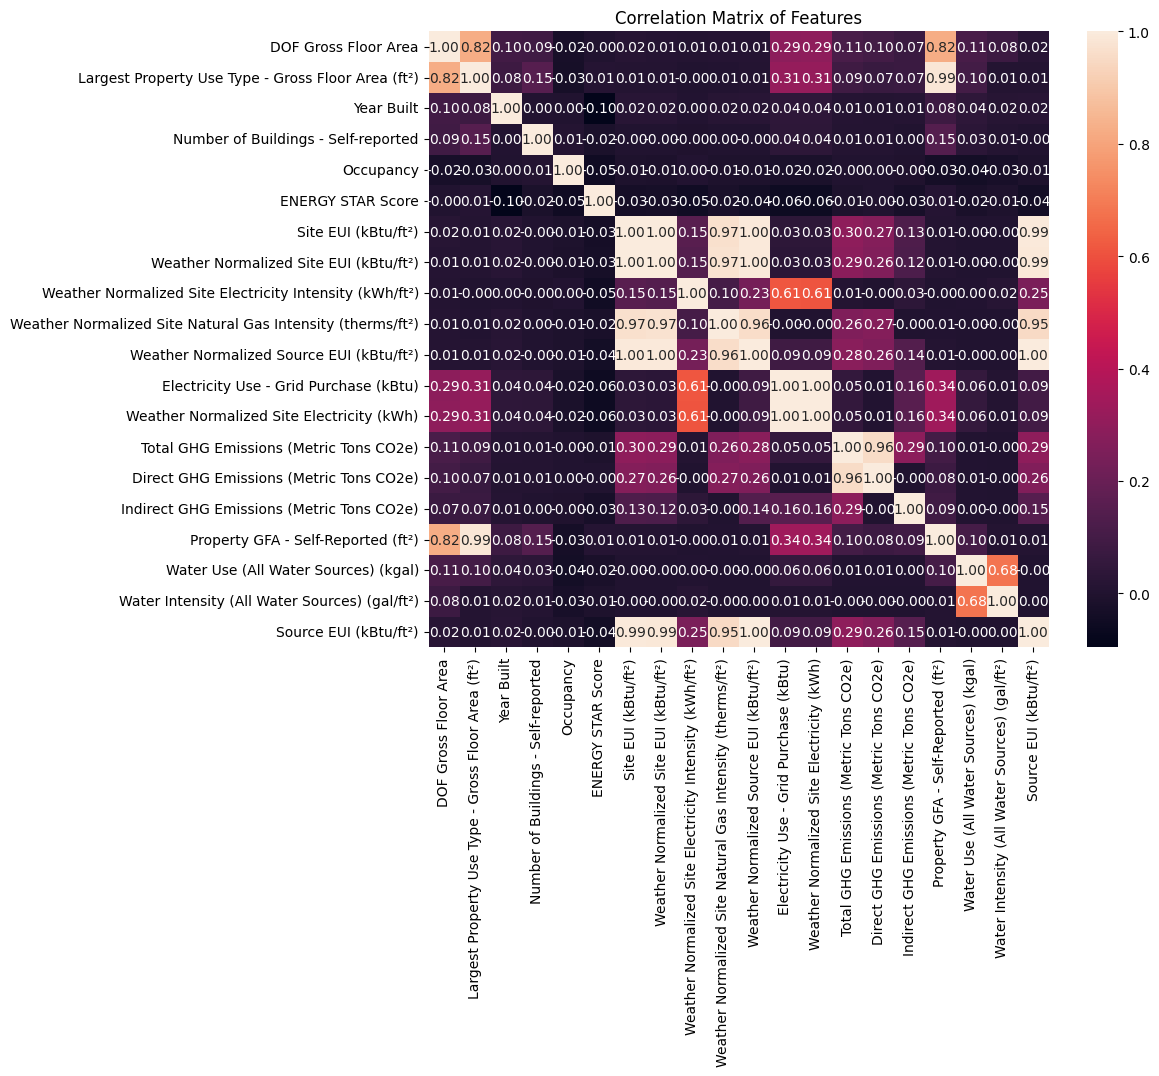

Correlation with ENERGY STAR Score:
ENERGY STAR Score                                             1.000000
Property GFA - Self-Reported (ft²)                            0.014812
Largest Property Use Type - Gross Floor Area (ft²)            0.012790
DOF Gross Floor Area                                         -0.001216
Direct GHG Emissions (Metric Tons CO2e)                      -0.001717
Water Intensity (All Water Sources) (gal/ft²)                -0.009253
Total GHG Emissions (Metric Tons CO2e)                       -0.009514
Number of Buildings - Self-reported                          -0.017670
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.021163
Water Use (All Water Sources) (kgal)                         -0.022712
Indirect GHG Emissions (Metric Tons CO2e)                    -0.027069
Weather Normalized Site EUI (kBtu/ft²)                       -0.031506
Site EUI (kBtu/ft²)                                          -0.033527
Weather Normalized Source EUI (kBtu/ft²) 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Calculate correlation matrix
corr_matrix = imputed_df.corr()

# Specifically look at correlations with the 'ENERGY STAR Score'
energy_star_correlations = corr_matrix['ENERGY STAR Score'].sort_values(ascending=False)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Print correlations with 'ENERGY STAR Score'
print("Correlation with ENERGY STAR Score:")
print(energy_star_correlations)


In [ ]:
import pandas as pd

# Assuming 'imputed_df' is your DataFrame
# Convert 'ENERGY STAR Score' to numeric, coerce errors to NaN
imputed_df['ENERGY STAR Score'] = pd.to_numeric(imputed_df['ENERGY STAR Score'], errors='coerce')

# Select numeric columns
numeric_df = imputed_df.select_dtypes(include=['float64', 'int64'])

# Drop rows with non-numeric entries
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce').dropna()

# Prepare your feature matrix `X` and target vector `y`
X = numeric_df.drop(['ENERGY STAR Score'], axis=1)
y = numeric_df['ENERGY STAR Score']


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

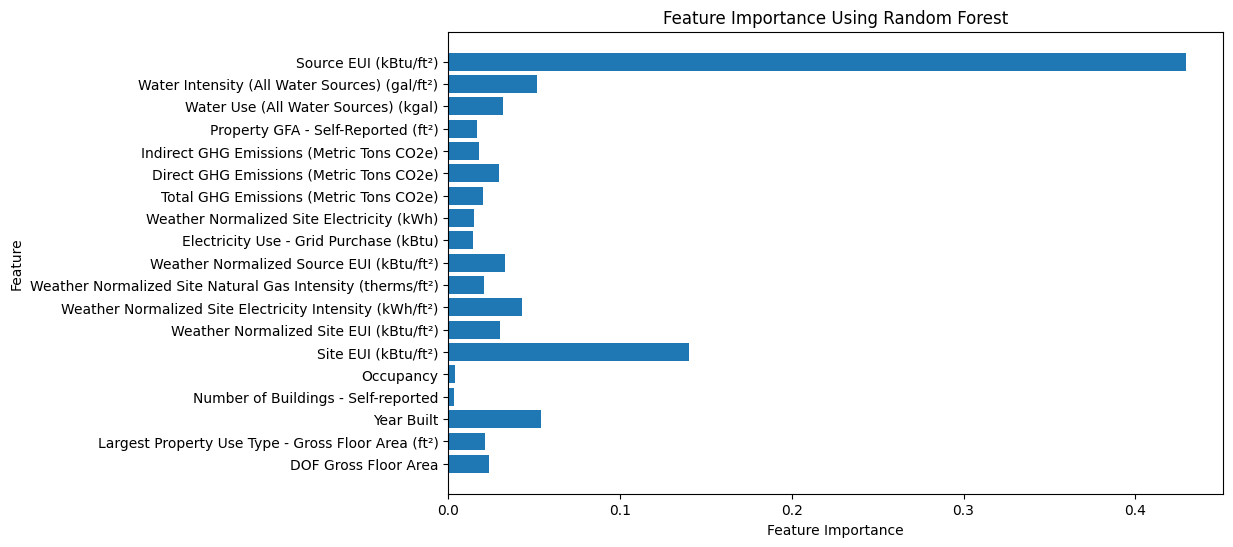

Mean Squared Error: 367.0722


In [ ]:
# Get feature importances
importances = model.feature_importances_

# Plot feature importances
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Using Random Forest")
plt.show()


# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace 'DOF Gross Floor Area' with the desired column name
specific_column = 'DOF Gross Floor Area'

# Calculate the correlation between the specific column and 'ENERGY STAR Score'
correlation = df['ENERGY STAR Score'].corr(df[specific_column])

# Print the correlation
print(f"Correlation between '{specific_column}' and 'ENERGY STAR Score': {correlation:.4f}")


Correlation between 'DOF Gross Floor Area' and 'ENERGY STAR Score': 0.0069
